# Import and Prepare Data

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read Census data CSV file into dataframe for Education Scores
census_df = pd.read_csv('Census Main Analysis Data with Pop.csv', 
                     dtype={"ZIPCODE":np.int32,"STATE":'category',
                             'ZipScore':np.float32,'YEAR':np.int32,
                            'Pop25over':np.int32}).iloc[:,1:]

# read IRS AGI data CSV file into dataframe for Income Scores
IRS_df = pd.read_csv('IRS AGI Main Analysis Data.csv', 
                     dtype={"ZIPCODE":np.int32,"STATE":'category',
                             'ZipScore':np.float32,'YEAR':np.int32}).iloc[:,1:]

# Create combined DataFrame focusing on data from 2011
census_subset_df = census_df[['ZIPCODE','ZipScore',"STATE",'YEAR','Pop25over']][census_df.YEAR == 2011].drop_duplicates().rename(
    columns={'ZipScore':'EduScore'})
irs_subset_df = IRS_df[['ZIPCODE','ZipScore',"STATE",'YEAR']][IRS_df.YEAR == 2011].drop_duplicates().rename(
    columns={'ZipScore':'IncomeScore'})
df_2011 = census_subset_df.merge(irs_subset_df,on=['ZIPCODE','YEAR',"STATE"])

# Create combined DataFrame focusing on data from 2017
census_subset_2017 = census_df[['ZIPCODE','ZipScore',"STATE",'YEAR','Pop25over']][census_df.YEAR == 2017].drop_duplicates().rename(columns={'ZipScore':'EduScore'})
irs_subset_2017 = IRS_df[['ZIPCODE','ZipScore',"STATE",'YEAR']][IRS_df.YEAR == 2017].drop_duplicates().rename(columns={'ZipScore':'IncomeScore'})
df_2017 = census_subset_df.merge(irs_subset_df,on=['ZIPCODE','YEAR',"STATE"])


df_2011.describe()

,ZIPCODE,EduScore,YEAR,Pop25over,IncomeScore
count,16337.000000,16337.000000,16337.0,16337.000000,16337.000000
mean,48337.876722,4.122257,2011.0,11346.512456,2.382323
std,28909.722159,0.633192,0.0,9906.151713,0.445833
min,1001.000000,1.997000,2011.0,27.000000,1.124896
25%,23453.000000,3.678000,2011.0,3462.000000,2.074827
50%,46792.000000,4.025000,2011.0,8290.000000,2.311016
75%,74426.000000,4.503000,2011.0,16968.000000,2.632047
max,99901.000000,6.562000,2011.0,70070.000000,4.562914


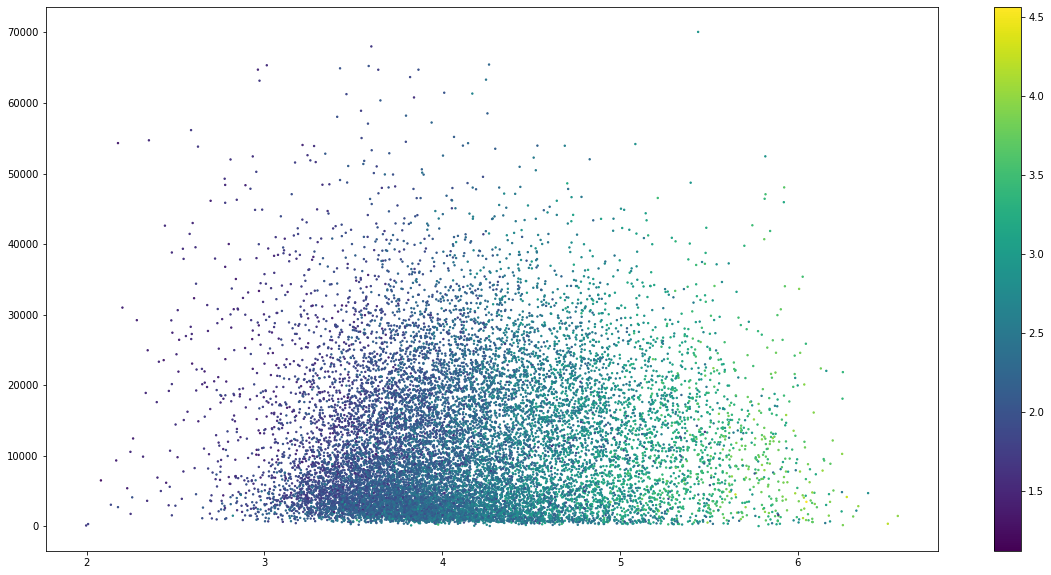

In [50]:
# plt.scatter(df_2011.EduScore, df_2011.IncomeScore,c=df_2011.ZIPCODE,cmap='viridis')
plt.figure(figsize=(20,10))
plt.scatter(df_2011.EduScore,df_2011.Pop25over,c=df_2011.IncomeScore,cmap='viridis',s=2)
plt.colorbar()

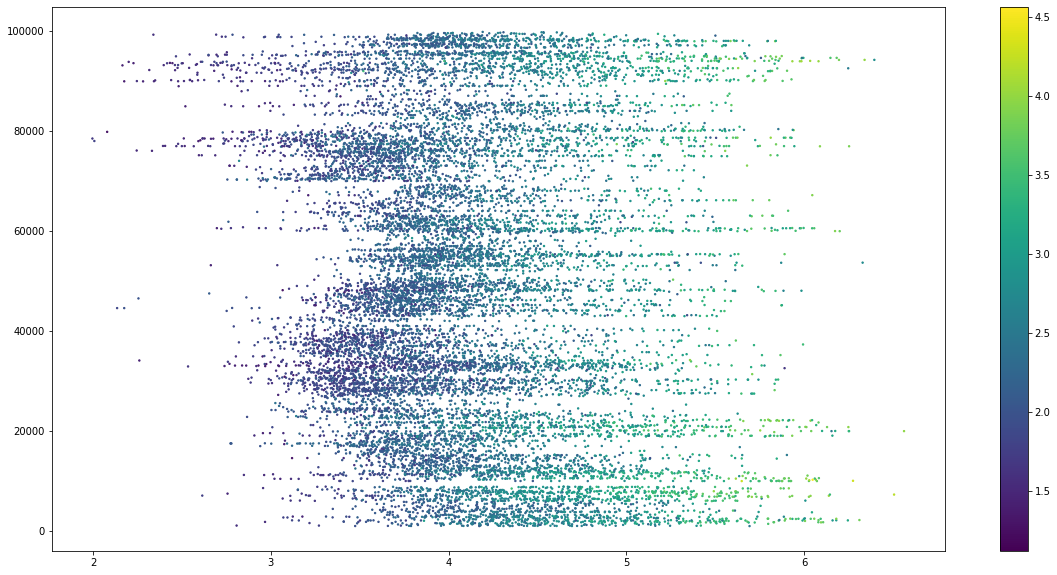

In [59]:
plt.figure(figsize=(20,10))
plt.scatter(df_2011.EduScore,df_2011.ZIPCODE,c=df_2011.IncomeScore,cmap='viridis',s=2)
plt.colorbar()

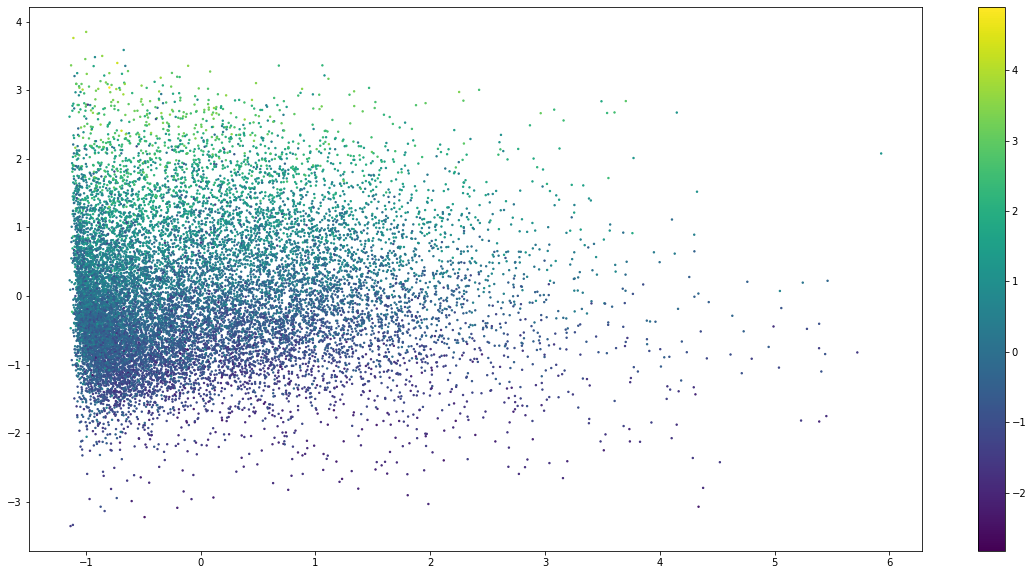

In [58]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
scaled_EduScore = scaler.fit_transform(np.array(df_2011.EduScore).reshape(-1, 1))
scaled_Pop25over = scaler.fit_transform(np.array(df_2011.Pop25over).reshape(-1, 1))
scaled_IncomeScore = scaler.fit_transform(np.array(df_2011.IncomeScore).reshape(-1, 1))

plt.figure(figsize=(20,10))
plt.scatter(scaled_Pop25over,scaled_EduScore,c=scaled_IncomeScore,cmap='viridis',s=2)
plt.colorbar()